In [4]:
!pip install --upgrade scikit-learn==1.6.1

## IMPORT LIBRARIES


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


## LOAD DATASET

In [3]:
data=pd.read_csv("amazon_reviews.csv")
data.head()

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [7]:
data.columns = ["Rating", "Title", "Review"]
data.head()

,Rating,Title,Review
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [9]:
data["Review"] = data["Title"] + " " + data["Review"]
data = data[['Review', 'Rating']]
data.head()

,Review,Rating
0,One of the best game music soundtracks - for a...,2
1,Batteries died within a year ... I bought this...,1
2,"works fine, but Maha Energy is better Check ou...",2
3,Great for the non-audiophile Reviewed quite a ...,2
4,DVD Player crapped out after one year I also b...,1


In [11]:
def sentiment(label):
    if label==1:
        return "Negative"
    elif label==2:
        return "Positive"
    else:
        return "Neutral"

In [13]:
data['Sentiment'] = data["Rating"].apply(sentiment)
data.head(10)

,Review,Rating,Sentiment
0,One of the best game music soundtracks - for a...,2,Positive
1,Batteries died within a year ... I bought this...,1,Negative
2,"works fine, but Maha Energy is better Check ou...",2,Positive
3,Great for the non-audiophile Reviewed quite a ...,2,Positive
4,DVD Player crapped out after one year I also b...,1,Negative
5,"Incorrect Disc I love the style of this, but a...",1,Negative
6,DVD menu select problems I cannot scroll throu...,1,Negative
7,Unique Weird Orientalia from the 1930's Exotic...,2,Positive
8,"Not an ""ultimate guide"" Firstly,I enjoyed the ...",1,Negative
9,Great book for travelling Europe I currently l...,2,Positive


In [15]:
data.value_counts("Sentiment")


Sentiment
Negative    200000
Positive    199999
Name: count, dtype: int64

C:\Users\ramku\AppData\Local\Temp\ipykernel_10508\3604460661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=data,   palette=["#3498db", "#e74c3c", "#2ecc71"])
C:\Users\ramku\AppData\Local\Temp\ipykernel_10508\3604460661.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x="Sentiment", data=data,   palette=["#3498db", "#e74c3c", "#2ecc71"])


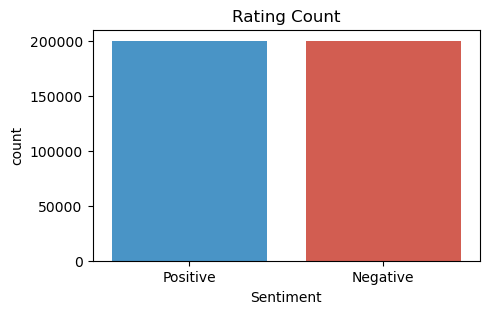

In [17]:
import seaborn as sns
plt.figure(figsize=(5,3))
sns.countplot(x="Sentiment", data=data,   palette=["#3498db", "#e74c3c", "#2ecc71"])
plt.title("Rating Count")
plt.show()

In [19]:
data.isna().sum()
data = data.fillna(' ')
data.isna().sum()

Review       0
Rating       0
Sentiment    0
dtype: int64

## Sampling the data

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(data, data["Sentiment"]):
    strat_data = data.reindex(train_index)

In [24]:
strat_data.head(10)


,Review,Rating,Sentiment
216273,Amazed at the positive reviews I'm amazed at t...,1,Negative
165105,Eclipse is the Best Eclipse is the best fusion...,2,Positive
183293,"More rapt and elegent than the Word, yet full ...",2,Positive
300767,Beanie Mania II I thought it went into the 201...,2,Positive
196156,Send in the idiots I think this book was over ...,1,Negative
197351,A True Classic I totally agree with Carlos thi...,2,Positive
179859,Published for eagles You have all heard the ex...,1,Negative
167850,AIA & Friends - Live at Hemingways Good old JB...,1,Negative
208189,Nice mat Perfect for the dog house - but my do...,1,Negative
11632,Not for TiVo The site did not state the versio...,1,Negative


In [30]:
strat_data.value_counts("Sentiment")

Sentiment
Negative    160000
Positive    159999
Name: count, dtype: int64

C:\Users\ramku\AppData\Local\Temp\ipykernel_10508\3604460661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=data,   palette=["#3498db", "#e74c3c", "#2ecc71"])
C:\Users\ramku\AppData\Local\Temp\ipykernel_10508\3604460661.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x="Sentiment", data=data,   palette=["#3498db", "#e74c3c", "#2ecc71"])


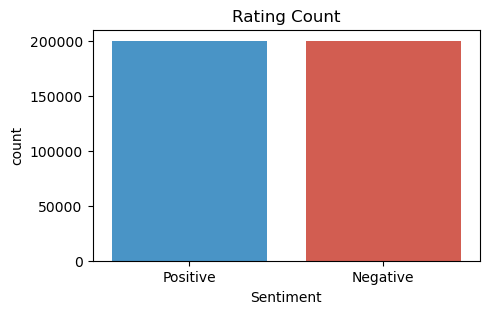

In [32]:
import seaborn as sns
plt.figure(figsize=(5,3))
sns.countplot(x="Sentiment", data=data,   palette=["#3498db", "#e74c3c", "#2ecc71"])
plt.title("Rating Count")
plt.show()

In [26]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#from nltk.stem.porter import PorterStemme

# Download required NLTK resources (Run this ONCE before calling preprocess_text)
nltk.download('stopwords')


def preprocess_text(text):
    
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\[.*?\]', '', text)  # Remove text inside square brackets
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)  # Tokenize text

    filtered_words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return ' '.join(lemmatized_words)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
strat_data["Review"] = strat_data["Review"].apply(preprocess_text)
strat_data.head(10)

,Review,Rating,Sentiment
216273,amazed positive review im amazed number people...,1,Negative
165105,eclipse best eclipse best fusion track listene...,2,Positive
183293,rapt elegent word yet full falling fai thou wi...,2,Positive
300767,beanie mania ii thought went beanie baby disap...,2,Positive
196156,send idiot think book written lot filler make ...,1,Negative
197351,true classic totally agree carlos true classic...,2,Positive
179859,published eagle heard expression read fine pri...,1,Negative
167850,aia friend live hemingway good old jb instrume...,1,Negative
208189,nice mat perfect dog house dog ate five minute...,1,Negative
11632,tivo site state version software tivo use vers...,1,Negative


## WORD CLOUD

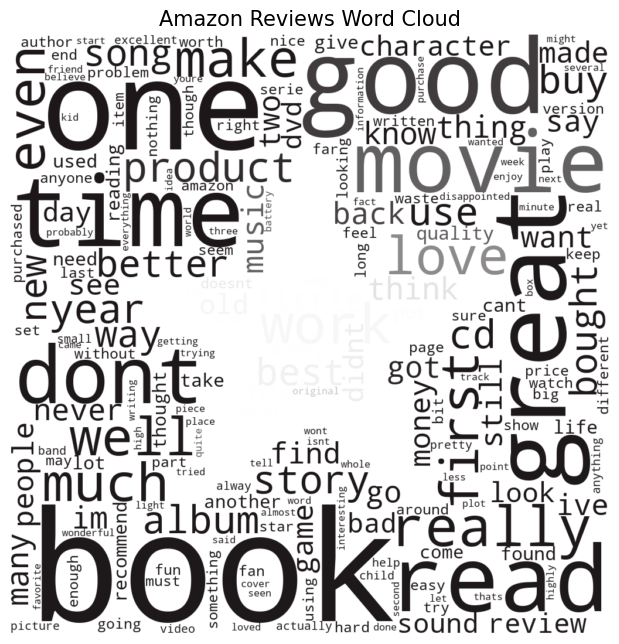

In [34]:
from PIL import Image
import requests
from wordcloud import WordCloud, ImageColorGenerator

txt = "".join(strat_data["Review"].tolist())
len(txt)
amazon_mask = np.array(Image.open(r"C:\Users\ramku\Downloads\wordcloud.webp"))

wc = WordCloud(width = 300, height = 200, random_state=1, background_color='white', colormap='Set2', collocations=False, mask=amazon_mask).generate(txt)
image_colors = ImageColorGenerator(amazon_mask)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(6,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation='bilinear')
plt.title("Amazon Reviews Word Cloud", fontsize = 15)
plt.savefig('wordcloud.png')
plt.show()

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(strat_data["Review"]).toarray()

## TRAIN TEST SPLIT

Training model with 100 samples...
Training model with 500 samples...
Training model with 1000 samples...
Training model with 5000 samples...
Training model with 10000 samples...
Training model with 50000 samples...
Training model with 100000 samples...
Training model with 200000 samples...
Training model with 300000 samples...


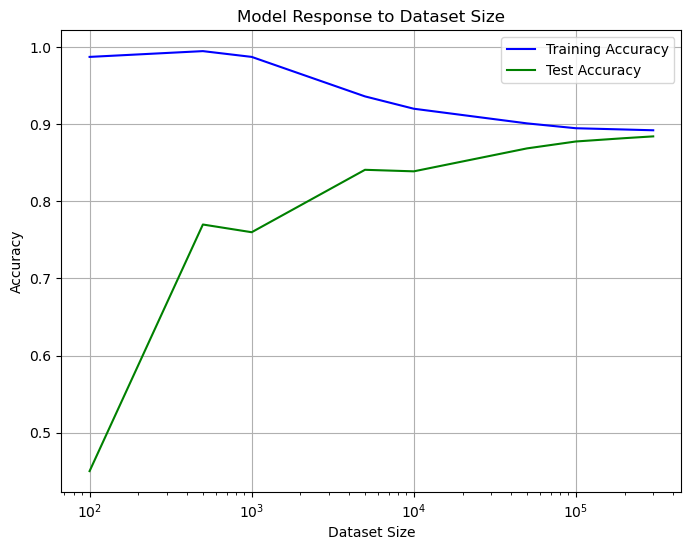

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix  # Save memory

# Define exponentially increasing dataset sizes
dataset_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000 , 200000, 300000]

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

for size in dataset_sizes:
    print(f"Training model with {size} samples...")

    # Sample 'size' number of data points
    strat_data_sample = strat_data.sample(n=size, random_state=42)
    X_sample = tfidf.transform(strat_data_sample["Review"])  # Transform using pre-fitted TF-IDF
    y_sample = strat_data_sample["Sentiment"].map({"Positive": 1, "Negative": 0})  # Convert labels

    # Convert to sparse format & float32 to save memory
    X_sample = csr_matrix(X_sample.astype("float32"))

    # Split into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    # Train Logistic Regression Model
    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_train, y_train)

    # Compute Accuracies
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Convert dataset sizes to log scale
plt.figure(figsize=(8,6))
plt.plot(dataset_sizes, train_accuracies, label="Training Accuracy", color="blue")
plt.plot(dataset_sizes, test_accuracies, label="Test Accuracy", color="green")

plt.xscale("log")  # Log scale for dataset size
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy")
plt.title("Model Response to Dataset Size")
plt.legend()
plt.grid(True)
plt.show()


## MODEL TRAINING

In [42]:
y=strat_data["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

## METRICS

In [46]:
y_pred = classifier.predict(X_test)

In [48]:
print(y_pred)

['Positive' 'Negative' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [50]:
accuracy_score(y_test, y_pred)

0.88215

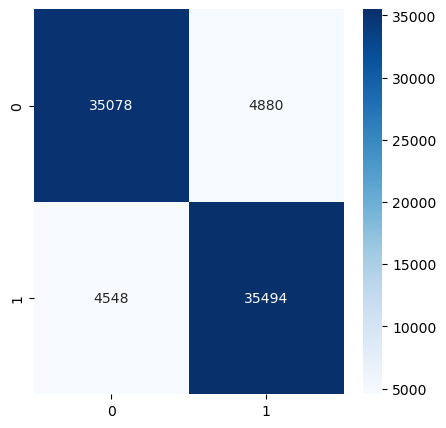

In [52]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Specify pos_label for binary classification
precision = precision_score(y_test, y_pred, pos_label="Positive")
recall = recall_score(y_test, y_pred, pos_label="Positive")
f1 = f1_score(y_test, y_pred, pos_label="Positive")

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed classification report for both Positive & Negative classes
print(classification_report(y_test, y_pred))


Precision: 0.883038465361296
Recall: 0.8893588267681065
F1 Score: 0.8861873768733947
              precision    recall  f1-score   support

    Negative       0.89      0.88      0.89     40042
    Positive       0.88      0.89      0.89     39958

    accuracy                           0.89     80000
   macro avg       0.89      0.89      0.89     80000
weighted avg       0.89      0.89      0.89     80000



In [47]:
import joblib
import os
save_path = r"D:\SEM PROJECTS\SEM 2\EOC-2 and MFC-2\Code" 

joblib.dump(classifier, save_path + "sentiment_model.pkl")
joblib.dump(tfidf, save_path + "tfidf_vectorizer.pkl")

print(f"Model and vectorizer saved successfully at {save_path}")


Model and vectorizer saved successfully at D:\SEM PROJECTS\SEM 2\EOC-2 and MFC-2\Code


In [51]:
def predict_sentiment(review):
    processed_review = preprocess_text(review)
    review_tfidf = tfidf.transform([processed_review])
    review_tfidf = review_tfidf
    prediction = classifier.predict(review_tfidf)
    
    return prediction[0]
review_text = "very good product"
predicted_sentiment = predict_sentiment(review_text)
print(f"Predicted Sentiment: {predicted_sentiment}")

review_text = "good"
predicted_sentiment = predict_sentiment(review_text)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: Positive
Predicted Sentiment: Positive


## TEXT SUMMARIZATION

In [5]:
df=pd.read_csv("product_reviews_amazon.csv")
df.head()

,country,countryCode,date,filterByKeyword,filterByRating,input,isAmazonVine,isVerified,position,product/listPrice,...,reviewReaction,reviewTitle,reviewUrl,reviewedIn,totalCategoryRatings,totalCategoryReviews,userId,userProfileLink,variant,variantAsin
0,India,NaN,2025-01-07,NaN,allStars,https://www.amazon.in/Spigen-Liquid-Case-Desig...,False,True,1,NaN,...,NaN,Quality and comfort,https://www.amazon.in/gp/customer-reviews/R1QI...,Reviewed in India on 7 January 2025,NaN,NaN,amzn1.account.AF5UFEC6EA7YNDKQIDHDIZSHRWKA,https://www.amazon.in/gp/profile/amzn1.account...,NaN,B07GJKQD4Z
1,India,NaN,2024-10-21,NaN,allStars,https://www.amazon.in/Spigen-Liquid-Case-Desig...,False,True,2,NaN,...,NaN,Good quality,https://www.amazon.in/gp/customer-reviews/RIIZ...,Reviewed in India on 21 October 2024,NaN,NaN,amzn1.account.AF25RKN3PRD2A5YQNXXUOXJOA46A,https://www.amazon.in/gp/profile/amzn1.account...,NaN,B07GJKQD4Z
2,India,NaN,2024-09-09,NaN,allStars,https://www.amazon.in/Spigen-Liquid-Case-Desig...,False,True,3,NaN,...,One person found this helpful,Don’t buy,https://www.amazon.in/gp/customer-reviews/R24D...,Reviewed in India on 9 September 2024,NaN,NaN,amzn1.account.AH65ZU5DH536JOPXHTGSQHTSXKIQ,https://www.amazon.in/gp/profile/amzn1.account...,NaN,B07GJKQD4Z
3,India,NaN,2024-05-20,NaN,allStars,https://www.amazon.in/Spigen-Liquid-Case-Desig...,False,True,4,NaN,...,NaN,Made my 4 year old phone look new,https://www.amazon.in/gp/customer-reviews/R24V...,Reviewed in India on 20 May 2024,NaN,NaN,amzn1.account.AFMZYK3SPAVRU5RSVJP7YGSOQEJA,https://www.amazon.in/gp/profile/amzn1.account...,NaN,B07GJKQD4Z
4,India,NaN,2023-12-17,NaN,allStars,https://www.amazon.in/Spigen-Liquid-Case-Desig...,False,True,5,NaN,...,NaN,Very nice,https://www.amazon.in/gp/customer-reviews/R1ON...,Reviewed in India on 17 December 2023,NaN,NaN,amzn1.account.AHQBXBKTF6UKYPKIMORSLJ65ECCQ,https://www.amazon.in/gp/profile/amzn1.account...,NaN,B07GJKQD4Z


In [7]:
df=df[['reviewTitle','reviewDescription']]
df.head()

,reviewTitle,reviewDescription
0,Quality and comfort,Well quality and comfort are awesome thanks to...
1,Good quality,Good quality and fit
2,Don’t buy,NaN
3,Made my 4 year old phone look new,I had an unbranded cover that used to heat the...
4,Very nice,Very nice


In [9]:
df = df[['reviewTitle', 'reviewDescription']].rename(columns={
    'reviewTitle': 'Title', 
    'reviewDescription': 'article_text'
})
df.head()

,Title,article_text
0,Quality and comfort,Well quality and comfort are awesome thanks to...
1,Good quality,Good quality and fit
2,Don’t buy,NaN
3,Made my 4 year old phone look new,I had an unbranded cover that used to heat the...
4,Very nice,Very nice


In [13]:
from nltk.tokenize import sent_tokenize

sentences = []
for s in df['article_text']:
    if isinstance(s, str):  # Ensure s is a string
        sentences.append(sent_tokenize(s))
    else:
        sentences.append([])  # Append an empty list for missing values

sentences = [y for x in sentences for y in x]  # Flatten the list
print(sentences[:5])


['Well quality and comfort are awesome thanks to Spigen!', '!', 'Good quality and fit', 'I had an unbranded cover that used to heat the phone.', 'I was about to give up my phone.']


In [17]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [37]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already available
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(sen):
    return " ".join([i for i in sen.split() if i.lower() not in stop_words])  # Convert to lowercase for better filtering

# Sample sentences
#clean_sentences = ["This is an example sentence.", "Stopwords should be removed from here."]

# ✅ Corrected Line
clean_sentences = [remove_stopwords(r) for r in clean_sentences]

print(clean_sentences)


['well quality comfort awesome thanks spigen!', '!', 'good quality fit', 'unbranded cover used heat phone.', 'give phone.', 'cover broke.i replaced cover heat issues gone.', 'looks phone become better.', 'phone may last couple years.', 'nice', 'used iphone xr!no complaints count.', 'looks, feel, protection, top class.dropped th phone twice.', 'damage.of course, drop phone face, guarantees might can, happen!but sides rear...........supremely effective.', 'super sleek cover', 'wonderful grip smooth edges soft texture, best quality', 'using case past 2 years it’s really goodinside kinda doesn’t look good it’s sturdy job', 'value money', 'good best product', 'good casefront lip lining extra screen protectionnot much heavy- balanced weightmust buy u consider using cases long time', 'nice fit', 'cover really best spigen.', 'however like apple logo seen, it’s you.i like design cover.', 'lets firm grip phone.', 'doesn’t add much weight.', 'camera front screen protected raised edges.the look sl

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [41]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

In [43]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [47]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [49]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [55]:
# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])

It gives the phone a soft and neat look.It appears sturdy and will certainly protect the phone in case of any drops.The only small drawback I feel is that when the phone is being picked up from a flat surface, the grip on the edges of the phone is a bit smooth.Other than that, the cover is a must buy in case you are looking for a new one.It will give you an executive appearance when handling the phone.
Best durable cover i have ever came across and usedI had been using this for 1.6 years now and i had dropped my iPhone xr many times from hand snd even from bike at 60kmph then also not a single scratch.I highly recommend to allSturdy and good qualityBuy it without any 2nd though.. you wont regret it
Good casefront lip lining for extra screen protectionnot much heavy- balanced weightMust buy if u consider using Cases for long time
I am using this case from past 2 years and it’s really goodInside kinda doesn’t look good but it’s sturdy and does the job
That means it makes the case a bit b

In [57]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

# Load dataset
df = pd.read_csv("product_reviews_amazon.csv")
df = df[['reviewTitle', 'reviewDescription']].rename(columns={'reviewTitle': 'Title', 'reviewDescription': 'article_text'})

# Tokenize sentences
sentences = []
for s in df['article_text'].dropna():  # Remove NaN values
    sentences.extend(sent_tokenize(s))  # Flatten sentence list

# Load GloVe word embeddings
word_embeddings = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = coefs

# Clean sentences: Remove punctuation, numbers, special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ", regex=True).str.lower()

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(sentence):
    return " ".join([word for word in sentence.split() if word not in stop_words])

clean_sentences = [remove_stopwords(sentence) for sentence in clean_sentences]

# Convert sentences to word vectors
def sentence_vector(sentence):
    words = sentence.split()
    if len(words) == 0:
        return np.zeros((100,))
    return np.mean([word_embeddings.get(w, np.zeros((100,))) for w in words], axis=0)

sentence_vectors = np.array([sentence_vector(sentence) for sentence in clean_sentences])

# Build similarity matrix
sim_mat = np.zeros((len(sentences), len(sentences)))
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1, 100), sentence_vectors[j].reshape(1, 100))[0, 0]

# Apply TextRank algorithm
nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

# Rank sentences based on TextRank scores
ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)

# Extract top 5 sentences as summary
summary = "\n".join([ranked_sentences[i][1] for i in range(5)])
print("### Extractive Summary ###\n", summary)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Extractive Summary ###
 It gives the phone a soft and neat look.It appears sturdy and will certainly protect the phone in case of any drops.The only small drawback I feel is that when the phone is being picked up from a flat surface, the grip on the edges of the phone is a bit smooth.Other than that, the cover is a must buy in case you are looking for a new one.It will give you an executive appearance when handling the phone.
Best durable cover i have ever came across and usedI had been using this for 1.6 years now and i had dropped my iPhone xr many times from hand snd even from bike at 60kmph then also not a single scratch.I highly recommend to allSturdy and good qualityBuy it without any 2nd though.. you wont regret it
Good casefront lip lining for extra screen protectionnot much heavy- balanced weightMust buy if u consider using Cases for long time
That means it makes the case a bit bulky, but it’s acceptable for the sake of the safety of the phone.The price is a bit higher, bu